In [2]:
using DelimitedFiles

# Training range
tspan = (0.0, 100.0)
num_of_samples = 300
tsteps = range(10.0, 12.0, length = num_of_samples)

10.0:0.006688963210702341:12.0

In [3]:
loaded_data = readdlm("original_data.txt")
original_data = Array{Float64}(loaded_data)

300×7 Matrix{Float64}:
 14.4192  91.3055   9.64597  139.192  -0.0  1.0  69.1533
 14.8141  91.0306   9.19928  139.192  -0.0  1.0  68.9071
 15.9968  90.7567   9.23629  139.192  -0.0  1.0  68.6631
 17.9616  90.4838   9.34389  139.192  -0.0  1.0  68.4197
 20.6988  90.2118   9.44989  139.192  -0.0  1.0  68.1766
 24.1949  89.9408   9.55432  139.192  -0.0  1.0  67.9335
 28.4329  89.6708   9.65722  139.192  -0.0  1.0  67.6892
 33.392   89.4017   9.7586   139.192  -0.0  1.0  67.4468
 39.0477  89.1336   9.85849  139.192  -0.0  1.0  67.2191
 45.3725  88.8665   9.95691  139.192  -0.0  1.0  66.9636
  ⋮                                         ⋮    
 14.0182  93.346   14.2537   135.182  -0.0  1.0  71.1069
 14.2022  93.0633  14.6748   137.022  -0.0  1.0  70.8329
 14.3493  92.7818  14.5988   138.493  -0.0  1.0  70.5589
 14.4273  92.5014  14.1      139.273  -0.0  1.0  70.2868
 14.4367  92.2221  13.4082   139.367  -0.0  1.0  70.0181
 14.4367  91.9438  12.6361   139.367  -0.0  1.0  69.7533
 14.4367  91.66

In [7]:
loaded_data = readdlm("pinn_data.txt")
pinn_data = Array{Float64}(loaded_data)
pinn_data[:, 6] .= 1.0
pinn_data

300×7 Matrix{Float64}:
  3.57784  70.3479  36.8908  111.876  -35.0354  1.0   7.61908
  3.8091   70.1191  36.8939  112.336  -35.0599  1.0   7.39357
  4.47452  69.8914  36.8969  112.797  -35.0844  1.0   7.16929
  5.57601  69.6651  36.8997  113.258  -35.1089  1.0   6.94627
  7.11319  69.44    36.9024  113.719  -35.1335  1.0   6.72451
  9.08341  69.2162  36.905   114.181  -35.1581  1.0   6.50403
 11.4818   68.9937  36.9074  114.643  -35.1828  1.0   6.28486
 14.3011   68.7725  36.9097  115.106  -35.2076  1.0   6.067
 17.5321   68.5527  36.9119  115.569  -35.2325  1.0   5.85048
 21.1634   68.3342  36.9139  116.032  -35.2574  1.0   5.6353
  ⋮                                             ⋮    
  4.19023  85.8871  41.3001  128.937  -44.0949  1.0  11.4734
  4.20876  85.5858  41.3037  129.502  -44.1223  1.0  11.1796
  4.22731  85.286   41.307   130.068  -44.1498  1.0  10.8874
  4.24588  84.9879  41.3102  130.634  -44.1773  1.0  10.5968
  4.26447  84.6914  41.3132  131.201  -44.2047  1.0  10.3077
 

In [6]:
loaded_data = readdlm("simple_data.txt")
simple_data = Array{Float64}(loaded_data)
simple_data[:, 6] .= 1.0
simple_data

300×7 Matrix{Float64}:
 0.843599  26.5386  19.5152  28.1247  -0.000234516  1.0  6.32739
 0.896983  26.5012  19.5129  28.1916  -0.000234516  1.0  6.29575
 1.05176   26.464   19.5106  28.2586  -0.000234516  1.0  6.2643
 1.3084    26.427   19.5084  28.3256  -0.000234516  1.0  6.23304
 1.66639   26.3902  19.506   28.3926  -0.000234516  1.0  6.20197
 2.1247    26.3536  19.5037  28.4597  -0.000234516  1.0  6.17108
 2.68179   26.3172  19.5013  28.5269  -0.000234516  1.0  6.14038
 3.33563   26.2809  19.499   28.5941  -0.000234516  1.0  6.10986
 4.08372   26.2448  19.4966  28.6613  -0.000234516  1.0  6.07952
 4.92305   26.2089  19.4941  28.7286  -0.000234516  1.0  6.04937
 ⋮                                                  ⋮    
 0.902475  27.9291  19.1843  30.1929  -0.000220697  1.0  7.87819
 0.904873  27.8826  19.1818  30.2729  -0.000220697  1.0  7.83853
 0.907272  27.8363  19.1793  30.3528  -0.000220697  1.0  7.7991
 0.909673  27.7902  19.1767  30.4329  -0.000220697  1.0  7.7599
 0.912075  2

In [ ]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(x, y1, label="Original", lw=2)
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end


plot_differences (generic function with 1 method)

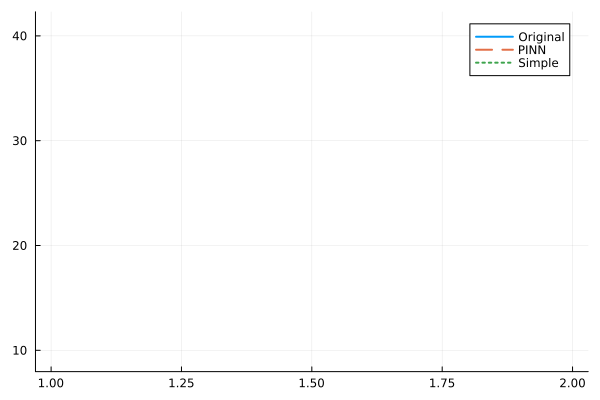

In [15]:
plot_differences(3)